Agent-Based Modelling of Consumer Decisions Regarding Game Purchases
-------------------------------


This model is developed as a tool for game development companies to identify the general popularity behind different game characteristics. The model incorporates real-life purchase decisions by weighing preferences of consumers against the overall weight of video game characteristics. Additionally, The model includes variability in consumer budget as well.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

class Consumer:
    def __init__(self, graphics_pref, gameplay_pref, story_pref, price_pref, budget):
        #Basic consumer preferences
        self.graphics_pref = graphics_pref
        self.gameplay_pref = gameplay_pref
        self.story_pref = story_pref
        self.price_pref = price_pref
        self.budget = budget
        self.game = None #Consumer has not purchased initially

    def choose_game(self, games):
        #Calculate score for EACH game and store in an array
        scores = []
        for game in games:
            graphics_score = self.graphics_pref * game.graphics
            gameplay_score = self.gameplay_pref * game.gameplay
            story_score = self.story_pref * game.story
            price_score = self.price_pref * (1 - game.price / self.budget)
            score = graphics_score + gameplay_score + story_score + price_score
            scores.append(score)

        #Choose (choose is an index) game with MAX score
        choose = scores.index(max(scores))
        self.game = games[choose]

class Game:
    def __init__(self, graphics, gameplay, story, price):
        self.graphics = graphics
        self.gameplay = gameplay
        self.story = story
        self.price = price

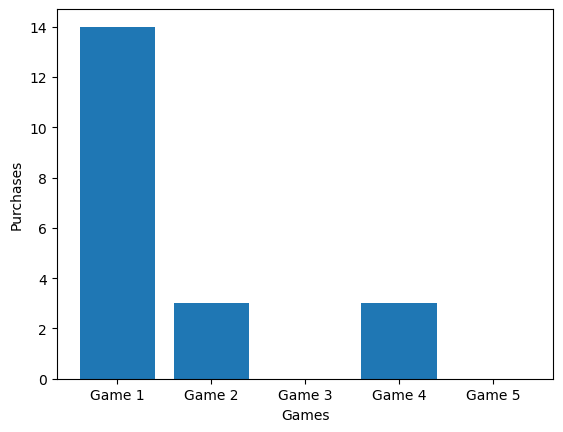

In [2]:
#Create 20 Consumers (all prefs random (and uniform) between 0 and 1 with budget being 20 - 100
consumers = []
for i in range(20):
    #create preferences
    graphics_pref = np.random.uniform(0, 1)
    gameplay_pref = np.random.uniform(0, 1)
    story_pref = np.random.uniform(0, 1)
    price_pref = np.random.uniform(0, 1)
    budget = np.random.randint(20, 100)
    #create consumer
    consumer = Consumer(graphics_pref, gameplay_pref, story_pref, price_pref, budget)
    #add to consumer list
    consumers.append(consumer)
    

#Create 5 Games with random chars
#This can be interchanged with hardcoded values to have a direct connection to steam games
#price has to be between 10 and 60.
games = []
for i in range(5):
    graphics_score = np.random.uniform(0, 1)
    gameplay_score = np.random.uniform(0, 1)
    story_score = np.random.uniform(0, 1)
    price = np.random.randint(10, 60)
    #create game
    game = Game(graphics_score, gameplay_score, story_score, price)
    #add to game list
    games.append(game)
    
    
#Run for 10 unit steps
for i in range(10):
    for consumer in consumers:
        consumer.choose_game(games)

#Make a graph
purchase_counts = np.zeros(len(games))

#increment game purchases based on consumer choices
for consumer in consumers:
    purchase_counts[games.index(consumer.game)] += 1

plt.bar(range(len(games)), purchase_counts)
plt.xticks(range(len(games)), [f'Game {i+1}' for i in range(len(games))])
plt.xlabel('Games')
plt.ylabel('Purchases')
plt.show()